In [45]:
%matplotlib inline

In [1]:
import pandas as pd

df = pd.read_csv("bestsellers with categories.csv")

In [2]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.shape
# Про скільки книг зберігає дані датасет? Відповідь: 

(550, 7)

In [4]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [5]:
df.isna().sum()
# Чи є в якихось змінних пропуски? Відповідь: Hi

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [6]:
df['genre'].unique()
# Які є унікальні жанри? Відповідь: Non Fiction, Fiction

array(['Non Fiction', 'Fiction'], dtype=object)

<Axes: ylabel='Frequency'>

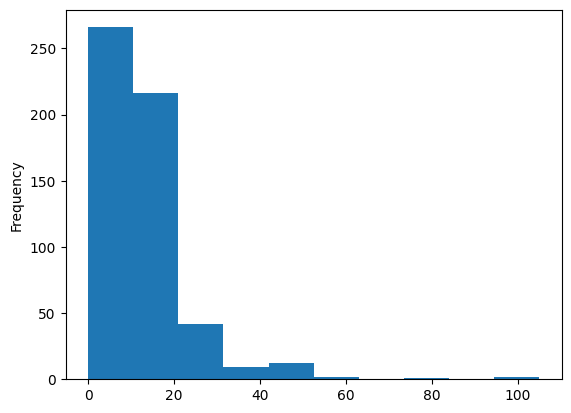

In [7]:
import matplotlib.pyplot as plt

prices = df["price"]
prices.plot(kind="hist")

In [8]:
prices.max()
# Максимальна ціна? Відповідь:

105

In [9]:
prices.min()
# Мінімальна ціна? Відповідь: 0

0

In [10]:
prices.mean()
# Середня ціна? Відповідь: 13.1

13.1

In [11]:
prices.median()
# Медіанна ціна? Відповідь: 11.0

11.0

In [12]:
df["user_rating"].max()
# Який рейтинг у датасеті найвищий? Відповідь: 4.9

4.9

In [13]:
(df["user_rating"] == 4.9).sum()
# Скільки книг мають такий рейтинг? Відповідь:

52

In [14]:
most_reviews_book_idx = df["reviews"].idxmax()
most_reviews_book = df.iloc[most_reviews_book_idx]
print(most_reviews_book)
# Яка книга має найбільше відгуків? Відповідь:

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [15]:
books_2015 = df[df["year"] == 2015]
print(books_2015["price"].max())
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:

46


In [16]:
fict_books_2010 = df[(df["year"] == 2010) & (df["genre"] == "Fiction")]
print(fict_books_2010.shape[0])
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:

20


In [17]:
highly_rated_books_2010_2011 = df[(df["year"].isin([2010, 2011]) & (df["user_rating"] == 4.9))]
print(highly_rated_books_2010_2011.shape[0])
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

1


In [18]:
cheap_books_2015 = df[(df["year"] == 2015) & (df["price"] < 8)]
cheap_books_2015 = cheap_books_2015.sort_values(by=['price'])
print(cheap_books_2015)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [19]:
cheap_books_2015.iloc[-1]
# Яка книга остання у відсортованому списку? Відповідь:

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

In [20]:
genre_prices = df.groupby(by="genre").agg(["min","max"])["price"]
print(genre_prices)

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


In [21]:
genre_prices.loc["Fiction"].loc["max"]
# Максимальна ціна для жанру Fiction: Відповідь

82

In [22]:
genre_prices.loc["Fiction"].loc["min"]
# Мінімальна ціна для жанру Fiction: Відповідь

0

In [23]:
genre_prices.loc["Non Fiction"].loc["max"]
# Максимальна ціна для жанру Non Fiction: Відповідь

105

In [24]:
genre_prices.loc["Non Fiction"].loc["min"]
# Мінімальна ціна для жанру Non Fiction: Відповідь

0

In [25]:
author_book_counts = df.groupby("author").agg(books=("author", "count"))
print(author_book_counts)

                            books
author                           
Abraham Verghese                2
Adam Gasiewski                  1
Adam Mansbach                   1
Adir Levy                       1
Admiral William H. McRaven      1
...                           ...
Walter Isaacson                 3
William Davis                   2
William P. Young                2
Wizards RPG Team                3
Zhi Gang Sha                    2

[248 rows x 1 columns]


In [26]:
print(author_book_counts.shape)
# Якої розмірності вийшла таблиця? Відповідь:

(248, 1)


In [27]:
author_book_counts["books"].idxmax()
# Який автор має найбільше книг? Відповідь:

'Jeff Kinney'

In [28]:
author_book_counts.loc[author_book_counts["books"].idxmax()]["books"]
# Скільки книг цього автора? Відповідь:

12

In [29]:
authors_rate = df.groupby(by="author").agg(average_rate=("user_rating", "mean")).round(1)
print(authors_rate)

                            average_rate
author                                  
Abraham Verghese                     4.6
Adam Gasiewski                       4.4
Adam Mansbach                        4.8
Adir Levy                            4.8
Admiral William H. McRaven           4.7
...                                  ...
Walter Isaacson                      4.6
William Davis                        4.4
William P. Young                     4.6
Wizards RPG Team                     4.8
Zhi Gang Sha                         4.6

[248 rows x 1 columns]


In [30]:
authors_rate.idxmin()
# У якого автора середній рейтинг мінімальний? Відповідь:

average_rate    Donna Tartt
dtype: object

In [31]:
authors_rate.loc[authors_rate["average_rate"].idxmin()]["average_rate"]
# Який у цього автора середній рейтинг? Відповідь:

3.9

In [32]:
authors_data =  pd.concat([author_book_counts, authors_rate], axis=1)
print(authors_data)

                            books  average_rate
author                                         
Abraham Verghese                2           4.6
Adam Gasiewski                  1           4.4
Adam Mansbach                   1           4.8
Adir Levy                       1           4.8
Admiral William H. McRaven      1           4.7
...                           ...           ...
Walter Isaacson                 3           4.6
William Davis                   2           4.4
William P. Young                2           4.6
Wizards RPG Team                3           4.8
Zhi Gang Sha                    2           4.6

[248 rows x 2 columns]


In [33]:
authors_data.sort_values(by=["books", "average_rate"], inplace=True)
print(authors_data)

                                    books  average_rate
author                                                 
Muriel Barbery                          1           4.0
Chris Cleave                            1           4.1
Ian K. Smith M.D.                       1           4.1
Pierre Dukan                            1           4.1
Elizabeth Strout                        1           4.2
...                                   ...           ...
American Psychological Association     10           4.5
Gary Chapman                           11           4.7
Suzanne Collins                        11           4.7
Rick Riordan                           11           4.8
Jeff Kinney                            12           4.8

[248 rows x 2 columns]


In [34]:
authors_data.iloc[0]
# Який автор перший у списку? Відповідь:

books           1.0
average_rate    4.0
Name: Muriel Barbery, dtype: float64

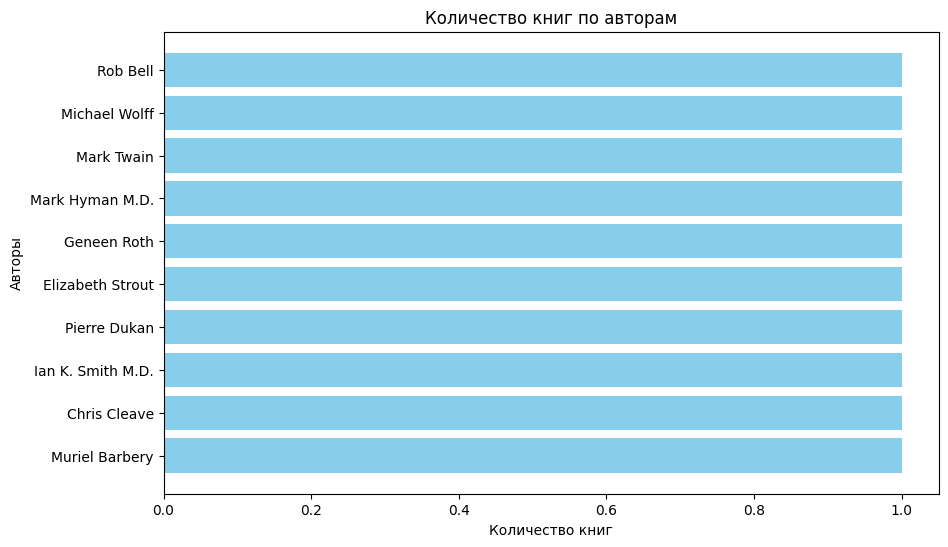

In [60]:
first_authors_data = authors_data.head(10)

plt.figure(figsize=(10, 6))
plt.barh(first_authors_data.index, first_authors_data["books"], color="skyblue")
plt.xlabel("Количество книг")
plt.ylabel("Авторы")
plt.title("Количество книг по авторам")
plt.show()

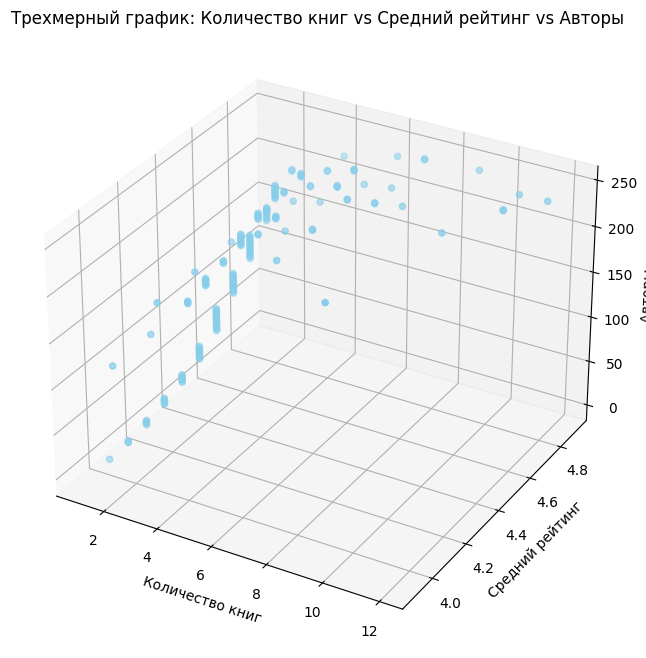

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

authors = authors_data.index
books = authors_data["books"]
average_rate = authors_data["average_rate"]

ax.scatter(books, average_rate, range(len(authors)), c='skyblue', marker='o')
ax.set_xlabel('Количество книг')
ax.set_ylabel('Средний рейтинг')
ax.set_zlabel('Авторы')

plt.title("Трехмерный график: Количество книг vs Средний рейтинг vs Авторы")
plt.show()

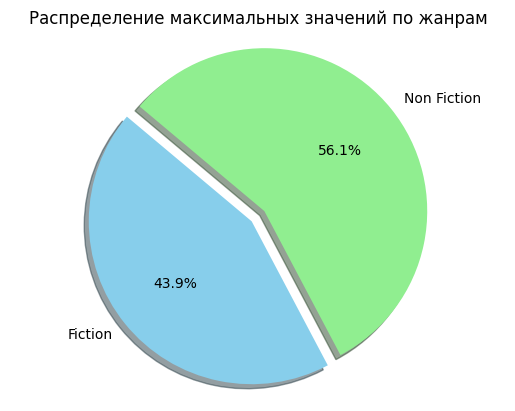

In [67]:
fig, ax = plt.subplots()
labels = genre_prices.index
max_values = [data[1] for data in genre_prices.values]
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)  # Выделение первого сегмента

ax.pie(max_values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.axis('equal')  # Обеспечиваем круговую форму диаграммы

plt.title("Распределение максимальных значений по жанрам")
plt.show()